In [1]:
# ===================================================================
#                          METADATA
# ===================================================================

# -------------------- General Information --------------------------
# 1. Title: Figure Script
# 2. Description: Script to reproduce Figure 1 in the article
# "Ionic Liquid--Electrode Interface: from One Law To Fit Them All to One Model To Predict Them All".
# 3. Authors:
#    - Ba Long Nguyen (ORCID: 0009-0003-7682-9851)
#    - Vladislav Ivanistsev (ORCID: 0000-0003-4517-0540)
# 4. Contact: balongn99@gmail.com & vladislav.ivanistsev@gmail.com
# 5. Keywords: differential capacitance, ionic liquids, modelling, fitting.

# -------------------- Identifiers & Versioning ---------------------
# 6. Version: 1.0.0
# 7. Date: 
#    - Created: 2025-06-13
#    - Last Modified: 2025-09-24
# 8. DOI: https://doi.org/10.1016/j.elecom.2025.108049

# -------------------- Usage & Accessibility ------------------------
# 10. License: This work is licensed under the MIT License.
# 11. Dependencies:
#     - Python 3.8+
#     - See 'requirements.txt' for necessary libraries (e.g., numpy, pandas, scipy, matplotlib).
# 13. Data Format:
#     - Units: Potential (V), Capacitance (μF/cm²), Surface Charge Density (μC/cm²)

In [2]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# ──────────────────── Plot styling ────────────────────
l = 8.25 / 2.54  # inches (half an A4 width)
plt.rc('figure', figsize=(l, l*0.8), dpi=500)
plt.rc('lines',  linewidth=1)
plt.rc('font',   size=10, family='sans-serif')
plt.rc('axes',   titlesize=10, labelsize=9)
plt.rc('xtick',  labelsize=8)
plt.rc('ytick',  labelsize=8)

In [6]:
# ──────────────────── POWER-LAW MODEL ────────────────────
def a_model(u, k1, k2, uM):
    return k1 + (1 - k1) * np.exp(-k2 * u / uM)

In [4]:
# ──────────────────── DATASETS ────────────────────
s = np.array([
    -40., -36., -32., -30., -28., -26., -24., -22., -20., -19., -18., -17.,
    -16., -15., -14., -13., -12., -10.,  -8.,  -6.,  -5.,  -4.5, -4.,  -3.5,
     -3.,  -2.5, -2.,  -1.5, -1.,  -0.5, -0.25, 0.,   0.25, 0.5,  1.,   1.5,
      2.,   2.5,  3.,   3.5,  4.,   4.5,  5.,   6.,   8.,  10.,  12.,  13.,
     14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,  24.,  26.,  28.,  30.,
     32.,  36.,  40.
])
U = np.array([
    -20.63965262, -17.77787358, -15.05145359, -13.7418511 , -12.4697356 ,
    -11.23659809, -10.04410656,  -8.89414331,  -7.78885421,  -7.25372101,
     -6.73071524,  -6.22021312,  -5.72262511,  -5.23840135,  -4.76803835,
     -4.31208741,  -3.87116527,  -3.03728873,  -2.2733033 ,  -1.5887285 ,
     -1.33755603,  -1.19082486,  -1.05757416,  -0.92841827,  -0.78367518,
     -0.66429409,  -0.53239152,  -0.41019812,  -0.28304792,  -0.14751724,
     -0.0795123 ,   0.        ,   0.06237433,   0.12131692,   0.22195643,
      0.30622031,   0.37369298,   0.46491487,   0.540774  ,   0.63043964,
      0.7264718 ,   0.8149609 ,   0.91713738,   1.11750276,   1.51156245,
      1.9643997 ,   2.48321079,   2.75653958,   3.03856559,   3.32891427,
      3.62725153,   3.93327702,   4.24671896,   4.5673299 ,   4.89488345,
      5.57000158,   6.27058846,   6.99536051,   7.74319454,   8.51309739,
      9.30418314,  10.94679343,  12.66549827
])
C = np.array([
    1.38099838, 1.43434765, 1.50300594, 1.54424311, 1.59091077, 1.64380039,
    1.70388739, 1.77238534, 1.85082084, 1.89435291, 1.94113886, 1.99151191,
    2.04585391, 2.10460449, 2.16827232, 2.2374492 , 2.3128276 , 2.50552863,
    2.79145844, 3.22865918, 3.53843459, 3.69025461, 3.78540913, 3.81423858,
    3.77367216, 3.72731422, 3.73517028, 3.79793444, 3.9213147 , 4.12545444,
    4.26831045, 4.4450424 , 4.64023197, 4.8321109 , 5.19343428, 5.5012915 ,
    5.72662439, 5.84476939, 5.8415952 , 5.71749251, 5.54304859, 5.38025495,
    5.22799766, 4.95130487, 4.48837825, 4.11695239, 3.81288701, 3.68080342,
    3.56035568, 3.45061239, 3.3503277 , 3.25844643, 3.17406923, 3.09642503,
    3.02484924, 2.89767503, 2.78877168, 2.69523888, 2.6148185 , 2.54573353,
    2.48657417, 2.39375992, 2.32983448
])
  
# ──────────────────── Constants ────────────────────
s_M, u_M = 28.0, 7.743195

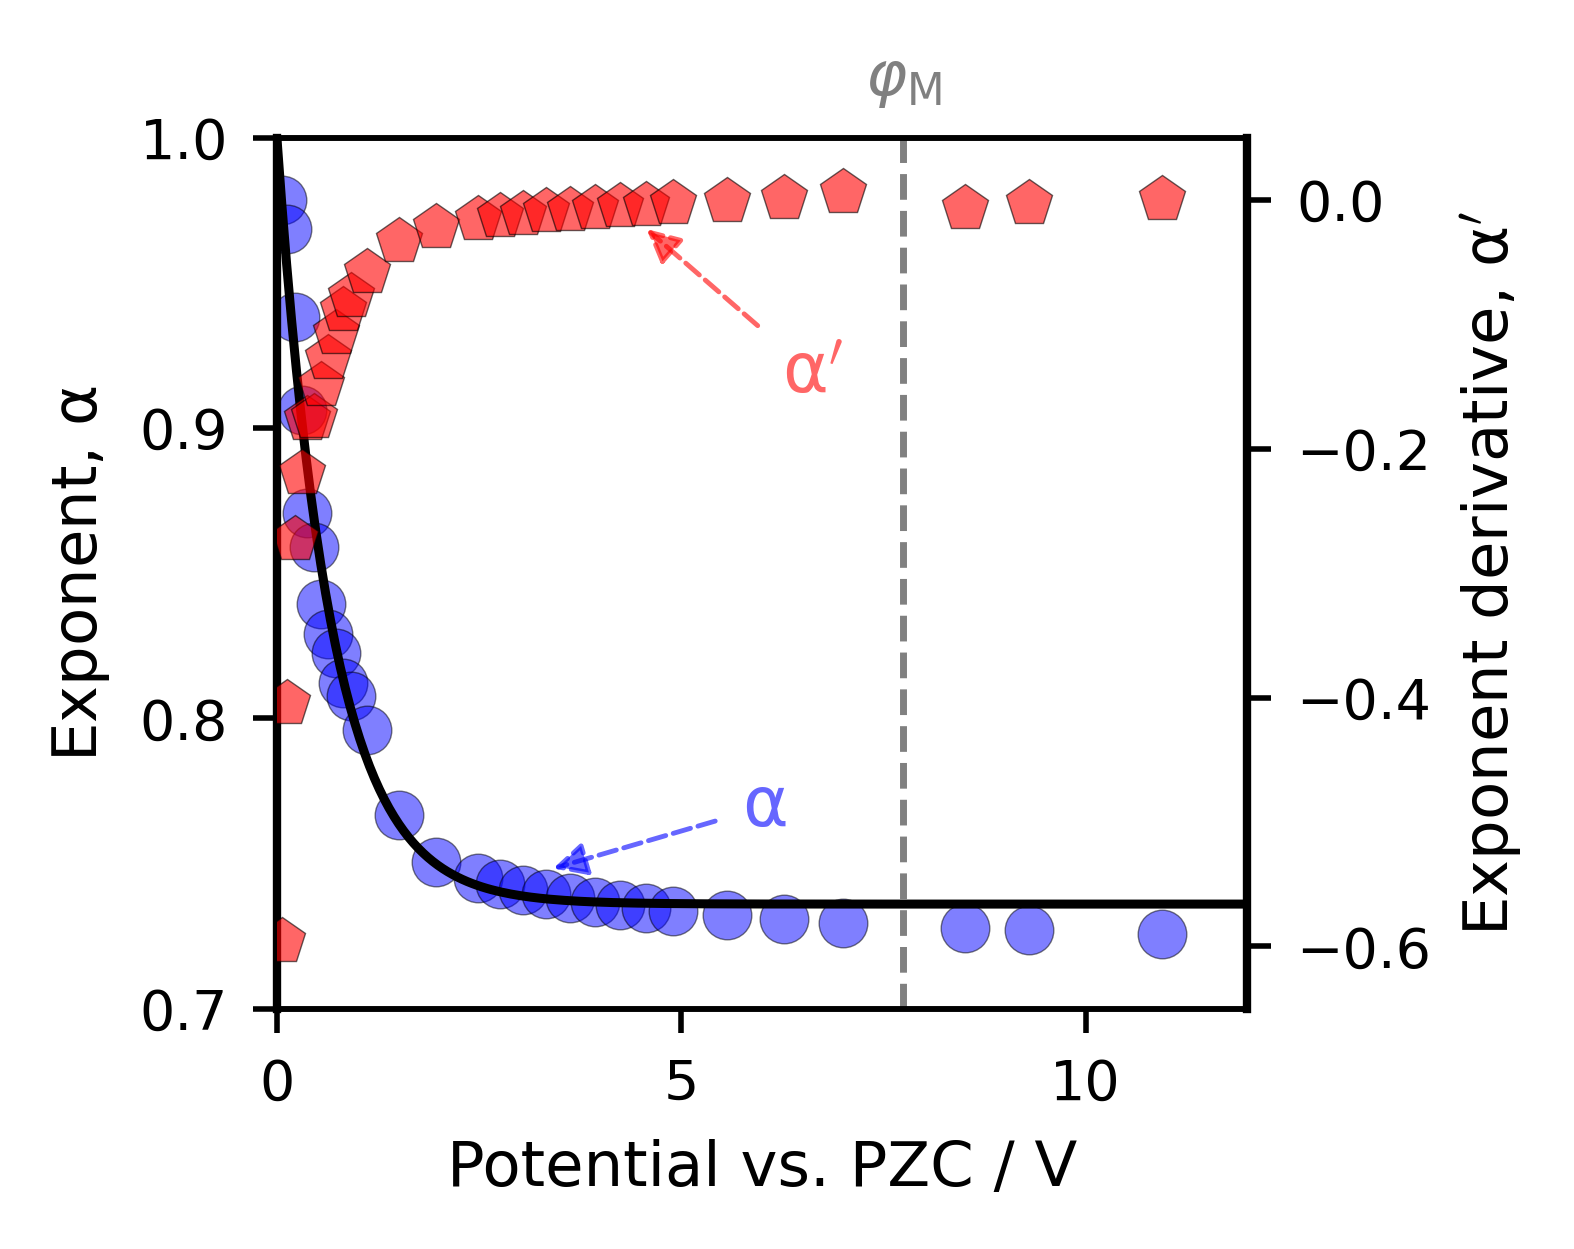

In [5]:
# ──────────────────── α and α′ ────────────────────
mask = U > 0
u_pos, s_pos, C_pos = U[mask], s[mask], C[mask]

a_vals = np.log(s_pos / s_M) / np.log(u_pos / u_M)
x      = u_pos / u_M
A      = a_vals * (s_M / u_M) * x ** (a_vals - 1)

with np.errstate(divide='ignore', invalid='ignore'):
    a_prime = (a_vals / (u_pos * np.log(x))) * (C_pos / A - 1)
a_prime[np.isclose(x, 1)] = np.nan  # singular point

fig, ax1 = plt.subplots()

# α (left axis)
ax1.plot(u_pos, a_vals, 'o', color='blue',
         markersize=7, markeredgecolor='black', markeredgewidth=0.2, zorder=3, alpha=0.5)

ax1.set_xlabel('Potential vs. PZC / V')
ax1.set_ylabel(r'Exponent, $\mathrm{\alpha}$')
ax1.set_xlim(0, 12)
ax1.set_ylim(0.7, 1.0)
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(0.1))

# Thicken left spine so it stays visible
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['left'].set_zorder(4)
ax1.tick_params(axis='y', zorder=5)

# α′ (right axis, twin)
ax2 = ax1.twinx()
ax2.plot(u_pos, a_prime, 'p', color='red',
         markersize=7, markeredgecolor='black', markeredgewidth=0.2, zorder=3, alpha=0.6)

ax2.set_ylabel(r"Exponent derivative, $\mathrm{\alpha'}$")
ax2.set_ylim(-0.65, 0.05)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.spines['right'].set_linewidth(1.2)

# Grey dashed vertical line at u_M
vline = ax1.axvline(u_M, color='grey', linestyle='--', linewidth=1, zorder=1)

# Add “uM” label at the top of the grey line
ax1.annotate("$\\varphi_\\mathrm{M}$",
             xy=(u_M, ax1.get_ylim()[1]),
             xytext=(0, 4), textcoords='offset points',
             ha='center', va='bottom', color='grey', fontsize=9)

# ─────────── Arrows & in-plot labels (dashed) ───────────
idx_alpha  = 1 * len(u_pos) // 2
idx_aprime = 2 * len(u_pos) // 3

# α arrow (blue, dashed)
ax1.annotate(r'$\mathrm{\alpha}$',
             xy=(u_pos[idx_alpha], a_vals[idx_alpha]),
             xytext=(u_pos[idx_alpha] + 3, a_vals[idx_alpha] + 0.02),
             color='blue',
             arrowprops=dict(arrowstyle='-|>', color='blue',
                             lw=0.7, linestyle='--', shrinkB=8.0, alpha=0.6),
             alpha=0.6, zorder=2)

# α′ arrow (red, dashed)
ax2.annotate(r"$\mathrm{\alpha'}$",
             xy=(u_pos[idx_aprime], a_prime[idx_aprime]),
             xytext=(u_pos[idx_aprime] + 2, a_prime[idx_aprime] - 0.15),
             color='red',
             arrowprops=dict(arrowstyle='-|>', color='red',
                             lw=0.7, linestyle='--', shrinkB=5.0, alpha=0.6),
             alpha=0.6, zorder=2)

u_range = np.linspace(0, 12, 200)
a_model_curve = a_model(u_range, 0.736, 11.6, 7.743)
ax1.plot(u_range, a_model_curve, '-', color='black', lw=1.3, zorder=5,
         label=r"$a(u)$ model ($k_1=0.76$, $k_2=13.9$, $u_M=28$)")

fig.tight_layout()
# fig.savefig("Figure_1_alpha.pdf", dpi=600, bbox_inches='tight')
plt.show()
